In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Markov Chain analysis function

In [ ]:
def analyze_markov_chain(transition_matrix):
    n = len(transition_matrix)
    G = nx.DiGraph()

    # Build graph from transition matrix
    for i in range(n):
        for j in range(n):
            if transition_matrix[i][j] > 0:
                G.add_edge(i, j, weight=transition_matrix[i][j])

    # Strongly connected components
    sccs = list(nx.strongly_connected_components(G))

    recurrent_classes = []
    recurrent_class_ids = {}
    transient_states = []

    class_id = 0
    for scc in sccs:
        is_closed = True
        for state in scc:
            for neighbor in G.successors(state):
                if neighbor not in scc:
                    is_closed = False
                    break
            if not is_closed:
                break

        if is_closed:
            for state in scc:
                recurrent_class_ids[state] = class_id
            recurrent_classes.append(scc)
            class_id += 1
        else:
            transient_states.extend(scc)

    print("State Analysis:")
    for i in range(n):
        if i in recurrent_class_ids:
            print(f"State {i}: Recurrent (Class ID: {recurrent_class_ids[i]})")
        else:
            print(f"State {i}: Transient")

    return G, recurrent_class_ids, transient_states

# Results and visualization

In [40]:
def visualize_markov_chain(G, recurrent_class_ids, transient_states):
    plt.figure(figsize=(12,6))
    pos = nx.spring_layout(G, seed=42)

    # Create node groups
    all_nodes = list(G.nodes())

    color_map = plt.colormaps['tab10']

    node_colors = []
    for node in all_nodes:
        if node in recurrent_class_ids:
            class_color = color_map(recurrent_class_ids[node])
            node_colors.append(class_color)
        else:
            node_colors.append('red')

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=400)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, arrows=True, edge_color='black')

    # Draw edge weights
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Markov Chain Graph (Drunkard's walk)")
    plt.axis('off')
    plt.show()


## Drunkard's Walk



State Analysis:
State 0: Recurrent (Class ID: 0)
State 1: Transient
State 2: Transient
State 3: Transient
State 4: Recurrent (Class ID: 1)


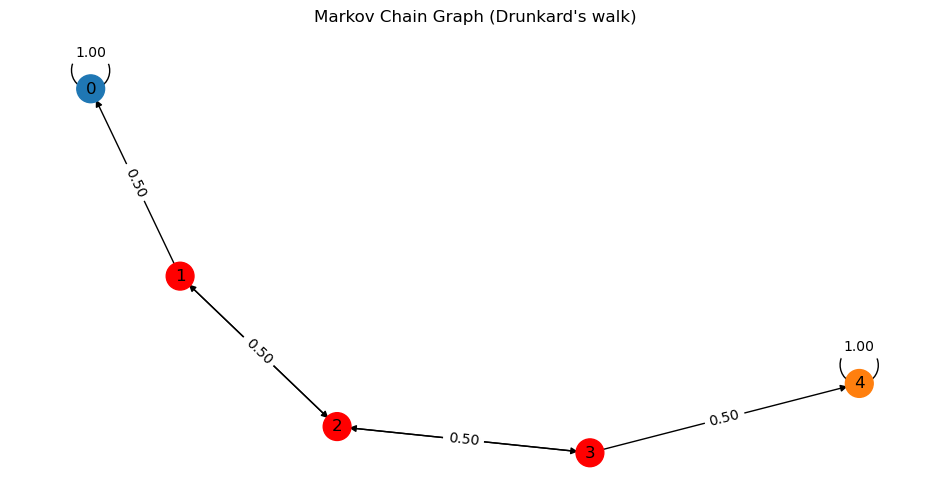

In [41]:
P = np.array([
    [1.0, 0.0, 0.0, 0.0, 0.0], # state 0
    [0.5, 0.0, 0.5, 0.0, 0.0], # state 1
    [0.0, 0.5, 0.0, 0.5, 0.0], # state 2
    [0.0, 0.0, 0.5, 0.0, 0.5], # state 3
    [0.0, 0.0, 0.0, 0.0, 1.0]])# state 4

G, recurrent_class_ids, transient_states = analyze_markov_chain(P)
visualize_markov_chain(G, recurrent_class_ids, transient_states)